<a href="https://colab.research.google.com/github/majahn/intro_data_analysis_biophys_101/blob/main/code/Explore_Flory_Huggins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explore Flory-Huggins

Is for a binary fluid, where lattice sites are occupied by either a **solvent** or a **solute** molecule.
$$
\frac{F}{kT} = \phi \ln\phi + (1-\phi)\ln(1-\phi) + \chi\phi(1 - \phi)
$$

where $\phi = \frac{N_{\mathrm{solvent}}}{N_{total}}$

### Recap Entropy

$$
S = - \sum p_n \ln p_n
$$

$$ 
y = x^2
$$

In [12]:
prob_dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6 ]
prob_coin = [1/2, 1/2]

In [8]:
-np.sum([p*np.log(p) for p in prob_dice])

1.7917594692280547

In [4]:
# check data type
type(prob_dice)

list

In [34]:
# get the right tools

import numpy as np
import matplotlib.pyplot as plt

In [10]:
def entropy(probabilities):

    S = - np.sum([p*np.log(p) for p in probabilities])

    return S

In [13]:
entropy(prob_coin)

0.6931471805599453

## Test the outrages claim that entropy is max for equal prob

In [15]:
prob_unfair_coin = [1/4, 3/4]

In [16]:
entropy(prob_unfair_coin)

0.5623351446188083

In [18]:
def coin(prob_head = 1/2):

    prob_tail = 1 - prob_head

    return [prob_head, prob_tail]

In [26]:
for i in np.linspace(0.01, 1-0.01, 10):
    print(f"Probabilities of the coin is: {coin(i)}")
    print(f"Entropy of this distribution is: {entropy(coin(i))}")
    print()
    

Probabilities of the coin is: [0.01, 0.99]
Entropy of this distribution is: 0.056001534354847345

Probabilities of the coin is: [0.11888888888888888, 0.8811111111111112]
Entropy of this distribution is: 0.36470531883113466

Probabilities of the coin is: [0.22777777777777777, 0.7722222222222223]
Entropy of this distribution is: 0.5365772317788616

Probabilities of the coin is: [0.33666666666666667, 0.6633333333333333]
Entropy of this distribution is: 0.6387997002523971

Probabilities of the coin is: [0.44555555555555554, 0.5544444444444445]
Entropy of this distribution is: 0.6872070142910418

Probabilities of the coin is: [0.5544444444444444, 0.4455555555555556]
Entropy of this distribution is: 0.6872070142910418

Probabilities of the coin is: [0.6633333333333333, 0.33666666666666667]
Entropy of this distribution is: 0.6387997002523971

Probabilities of the coin is: [0.7722222222222221, 0.22777777777777786]
Entropy of this distribution is: 0.5365772317788617

Probabilities of the coin i

In [28]:
prob_head = np.linspace(0.01, 0.99, 1000)
list_of_coins = [coin(i) for i in prob_head]
entropies = [entropy(coin) for coin in list_of_coins]

Text(0.5, 1.0, 'Entropy of different fair and unfair coins')

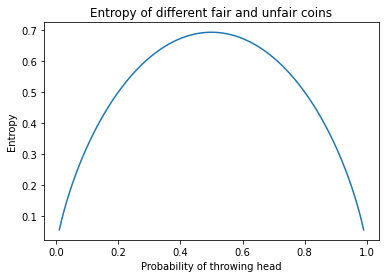

In [37]:
plt.plot(prob_head, entropies)
plt.xlabel("Probability of throwing head")
plt.ylabel("Entropy")
plt.title("Entropy of different fair and unfair coins")

In [31]:
entropies[55]

0.23771112874386569

### The interaction engergy term of Flory-Huggins

$$
\frac{F}{kT} = \phi \ln\phi + (1-\phi)\ln(1-\phi) + \chi\phi(1 - \phi)
$$.

The interaction energy parameter $\chi$ is defined as:

$$
\chi = \frac{z}{kT} \times(u_{ps} - \frac{1}{2}(u_{ss} + u_{pp}))
$$

$z$ is the number of neighbours in the lattice. For 2D each molecule has 8 neighbours. In 3D each molecule in this simple cubic lattice has 26 neighbours 

In [41]:
def chi(u_ss = 1,
        u_pp = 1,
        u_ps = 1,
        z = 26,
        kT = 4.11):
    
    result = z/kT * (u_ps - 0.5*(u_ss + u_pp))

    return result

In [61]:
chi(u_ps = 3, u_pp = 0.4)

14.549878345498781

In [45]:
def flory_huggins(phi, chi, kT=4.11):

    part_a = phi * np.log(phi)
    part_b = (1-phi)*np.log(1 - phi)
    part_c = chi * phi * (1-phi)

    result = kT * (part_a + part_b + part_c)

    return result


In [46]:
flory_huggins(0.5, chi())


-2.8488349121013754

In [51]:
phis = np.linspace(0.01, 0.99, 1000)

In [77]:

fh_orignial_mixing_no_interactions = [flory_huggins(phi, 0) for phi in phis]
fh_2 = [flory_huggins(phi, chi(u_ps = 1, u_pp = 0.4)) for phi in phis]
fh_3 = [flory_huggins(phi, chi(u_ps = 1.2, u_pp = 0.4)) for phi in phis]

Text(0.5, 1.0, 'Flory-Huggins for phase separation')

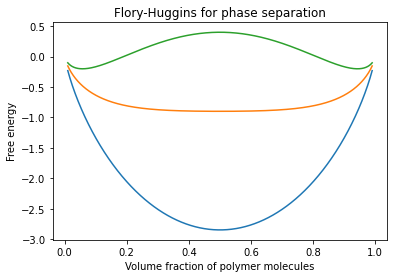

In [78]:
plt.plot(phis, fh_orignial_mixing_no_interactions)
plt.plot(phis, fh_2)
plt.plot(phis, fh_3)
plt.xlabel("Volume fraction of polymer molecules")
plt.ylabel("Free energy")
plt.title("Flory-Huggins for phase separation")